hello world


In [ ]:
import pandas as pd

df=pd.read_excel(r"C:\Users\nitis\Desktop\coursera_data analyst _course\python_data_cleaning_files\Customer Call List.xlsx")
## working with the name cloumns
df=df.drop_duplicates()
df["Last_Name"] = df["Last_Name"].str.strip("/.,;:!@#$%^&*()_+=-`~?<>|")

## working with the phone numnber colums
df["Phone_Number"] = df["Phone_Number"].str.replace('[^0-9a-zA-Z]','',regex=True)
## fromat the phone number as xxx-xxx-xxxx
## you first need to conver the phone numner to string and then apply the formating
df["Phone_Number"] = df["Phone_Number"].apply(lambda x: str(x))
df["Phone_Number"] = df["Phone_Number"].apply(lambda x: '('+x[0:3]+')'+x[3:6]+'-'+x[6:10])
df["Phone_Number"] = df["Phone_Number"].str.replace('(nan)-','')
df["Phone_Number"] = df["Phone_Number"].str.replace('(Na)-','')



## working with the address column : need to split the address into street, city, state and zip code

df[["Street_Address","City","Zip_Code"]] = df["Address"].str.split(",",n=2,expand=True)
df["Do_Not_Contact"] = df["Do_Not_Contact"].str.replace("Yes","Y")
df["Do_Not_Contact"] = df["Do_Not_Contact"].str.replace("No","N")
df=df.drop(columns="Not_Useful_Column")

df["Paying Customer"] = df["Paying Customer"].str.replace("Yes","Y")
df["Paying Customer"] = df["Paying Customer"].str.replace("No","N")

df=df.replace('N/a','')

df=df.fillna('')
## now we need to prepare so that if the do not contact is y the we need to remove the entire row  
for x in df.index :
    if df.loc[x,"Do_Not_Contact"] == "Y":
        df.drop(x,inplace=True)

## if the phone number is empty then we need to remove the entire row
## this is vectorisation of the above for loop : i says that retrurn the data frame where the phone number is not empty

df=df[df["Phone_Number"]!='']
##or you can also do this as 
# df=df.dropna(subset=["Phone_Number"])

## now we need to reindex the data frame after dropping the rows

df=df.drop(columns="Address") 
df=df.reset_index(drop=True)

# now save it to a new excel file

df.to_excel(r"C:\Users\nitis\Desktop\coursera_data analyst _course\python_data_cleaning_files\Customer Call List Cleaned.xlsx",index=False)
df

,CustomerID,First_Name,Last_Name,Phone_Number,Paying Customer,Do_Not_Contact,Street_Address,City,Zip_Code
0,1001,Frodo,Baggins,(123)545-5421,Y,N,123 Shire Lane,Shire,
1,1005,Jon,Snow,(876)678-3469,Y,N,123 Dragons Road,,
2,1008,Sherlock,Holmes,(876)678-3469,N,N,98 Clue Drive,,
3,1010,Peter,Parker,(123)545-5421,Y,N,25th Main Street,New York,
4,1013,Don,Draper,(123)543-2345,Y,N,2039 Main Street,,
5,1014,Leslie,Knope,(876)678-3469,Y,N,343 City Parkway,,
6,1015,Toby,Flenderson,(304)762-2467,N,N,214 HR Avenue,,
7,1016,Ron,Weasley,(123)545-5421,N,N,2395 Hogwarts Avenue,,
8,1017,Michael,Scott,(123)643-9775,Y,N,121 Paper Avenue,Pennsylvania,
9,1020,Anakin,Skywalker,(876)678-3469,Y,N,910 Tatooine Road,Tatooine,


In [24]:
print(type(df["Phone_Number"][0]))

<class 'str'>


In [2]:
x,y,z=5,15,0
print (z)
z=x+y
print(x+y)


0
20


In [3]:
#example of string slicing and string concatenation.

name='Nitish Pardal'
alias=name[0:3]+name[10:13]
print (alias)


Nitdal


This is a markdown which is meant to write the normal text inside a jupyter notebook , same as a notepad notes.
This is will not be included in the code part and still will appear ont the notebook.

In [4]:
print('nitish'.upper())
print(str(1+1))
print('ABC'.replace("AB","ab"))
x=2/2
print(x)
string = "Fun Python"
print(string[0:5])


NITISH
2
abC
1.0
Fun P


In [5]:
tuple1=(1,2,("pop","rock"),(3,4),("disco",(1,2)))
print(type(tuple1))
print(tuple1[2][1])
print(tuple1[4])
print(tuple1[4][1])
print(tuple1[4][1][0])

<class 'tuple'>
rock
('disco', (1, 2))
(1, 2)
1


tuples and lists:

In [6]:
A=(0,1,2,3)
print(A[0:2])
l=['a','b','c']
print(l[0:2])
l[0]='A'
print(l)
set1=set(['A','B','C','A','B','C'])  
print(list)


(0, 1)
['a', 'b']
['A', 'b', 'c']
<class 'list'>


In [7]:
list1=[1,1,1,2,3,1,1]
list2=[]
i=0
while (list1[i]==1):
  list2.append(list1[i])
  i=i+1
print (list2)

[1, 1, 1]


In [8]:
PlayListRatings = [10, 9.5, 10, 8, 7.5, 5, 10, 10]
i=0
rating=PlayListRatings[0]
while (i<len(PlayListRatings) and rating >=6):
    print (rating)
    i=i+1
    rating=PlayListRatings[i]
    #i=i+1

10
9.5
10
8
7.5


In [9]:
# Write your code below and press Shift+Enter to execute

squares = ['orange', 'orange', 'purple', 'blue ', 'orange']
new_squares = []
i=0
while (squares[i] == 'orange'):
    new_squares.append(squares[i])
    i+=1
print(new_squares)


['orange', 'orange']


In [10]:
string1 = "Mary had a little lamb little lamb, little lamb Mary had a little lamb.Its fleece was white as snow And everywhere that Mary went Mary went, Mary went Everywhere that Mary went The lamb was sure to go"
def freq(word):
    words=string1.split()
    count =0
    for i in words:
        if (i == word):
          count=count+1
    print(count)
freq("little")

4


In [11]:
def safe_divide(num,den):
    try:
        result=num/den
        return result
    except ZeroDivisionError:
        print("Error: Cannot divide by Zero")
    except TypeError:
        print("the type of value entered is wrong")
    

numerator=input("enter the numerator")
denominator=input("enter the demoninator")
print(safe_divide(numerator,denominator))

the type of value entered is wrong
None


In [12]:
#Type your code here
import math
def squareroot(numer1):
    try :
        sqrt=math.sqrt(numer1)
        return sqrt
    except ValueError:
        return ("'Invalid input! Please enter a positive integer or a float value.")
n1=int(input("enter the number"))
print (squareroot(n1))

ValueError: invalid literal for int() with base 10: ''

In [ ]:
#Type your code here
def mathematical(n):
    try:
        result=num/(num-5)
        return (f"Result:{result}")
    except Exception as e:
        return e
num=int(input("Enter your Number"))
print(mathematical(num))

Result:2.6666666666666665


In [ ]:

class rectangle (object):
  def __init__(self,width,length,color):
    self.width=width
    self.length=length
    self.color=color

  def area(self):
      return(self.length * self.width)


redrectangle=rectangle(2,4,"red") 
print(redrectangle.area())

bluerectangle=rectangle(3,4,"blue")
print(bluerectangle.area())


8
12


AttributeError: module 'matplotlib.pyplot' has no attribute 'circle'

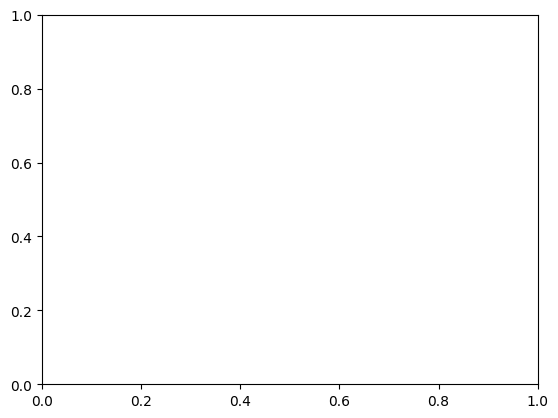

In [ ]:
import matplotlib.pyplot as plt # type: ignore
%matplotlib inline
class circle(object):
  def __init__(self,radius,color):
    self.radius=radius
    self.color=color

  def area_circle(self):
    return (self.radius*self.radius)
  
  def drawcircle(self):
    plt.gca().add_patch(plt.circle((0, 0), radius=self.radius, fc=self.color))
    plt.axis('scaled')
    plt.show()   


circle1=circle(5,"red")
circle1.drawcircle()
  

In [ ]:
class Vehicle (object):
    color = "white"

    def __init__(self, max_speed, mileage):
        self.max_speed = max_speed
        self.mileage = mileage

car1=Vehicle(200,20)
print(car1.color)

car2=Vehicle(250,15)
print(car2.color)

        

white
white


In [ ]:
class Graph():
    def __init__(self, id):
        self.id = id
        self.id = 80


val = Graph(200)
print(val.id)

80


In [ ]:
class vehicle (object):
  def __init__(self,max_speed,mileage):
    self.max_speed=max_speed
    self.mileage=mileage
    self.seating_capacity=None #the seating capacity is still not defined

  def assign_seating_capacity(self,seating_capacity):
    self.seating_capacity=seating_capacity

  def print_all(self): # function to print all the assigned attibutes to the object of the class vehicle
    print ("mileage=",self.mileage)
    print ("max speed=",self.max_speed)
    print("capacity=",self.seating_capacity)



car1= vehicle(1230,2)
car1.assign_seating_capacity(4)
car1.print_all()

mileage= 2
max speed= 1230
capacity= 4


In [ ]:
x=1
x=x>5
print (x)

False


In [ ]:
class Points(object): 
    def __init__(self, x, y): 
        self.x = x 
        self.y = y 
    def print_point(self): 
        print('x=', self.x, ' y=', self.y) 


p1 = Points(1, 2) 
p1.print_point()

x= 1  y= 2


In [ ]:
for i, x in enumerate(['A', 'B', 'C']): 
    print(i + 1, x)
    

1 A
2 B
3 C


In [ ]:
class Points(object): 
    def __init__(self, x, y): 
        self.x = x 
        self.y = y 
    def print_point(self): 
        print('x=', self.x, ' y=', self.y) 


p2 = Points(1, 2) 
p2.x = 2 
p2.print_point()

x= 2  y= 2


In [ ]:
a = 1 


def do(x): 
    return x + a 


print(do(1))

2


Let's consider a real-life scenario where you are analyzing customer feedback for a product. You have a large data set of customer reviews in the form of strings, and you want to extract useful information from them using the three identified tasks:

Task 1. String in lowercase: You want to pre-process the customer feedback by converting all the text to lowercase. This step helps standardize the text. Lower casing the text allows you to focus on the content rather than the specific letter casing.

Task 2. Frequency of all words in a given string: After converting the text to lowercase, you want to determine the frequency of each word in the customer feedback. This information will help you identify which words are used more frequently, indicating the key aspects or topics that customers are mentioning in their reviews. By analyzing the word frequencies, you can gain insights into the most common issues raised by customers.

Task 3. Frequency of a specific word: In addition to analyzing the overall word frequencies, you want to specifically track the frequency of a particular word that is relevant to your analysis. For example, you might be interested in monitoring how often the word "reliable" appears in customer reviews to gauge customer sentiment about the product's reliability. By focusing on the frequency of a specific word, you can gain a deeper understanding of customer opinions or preferences related to that particular aspect.

By performing these tasks on the customer feedback dataset, you can gain valuable insights into customer sentiment

In [ ]:
class textAnalyzer(object):
  def __init__(self,text):
    self.text=text
    #formatting the text , Replacing the punctuations 
    formatted_Text=text.replace(',','').replace('.','').replace('!','').replace('?','')
    #converting all the text to lower case and assigning the text to the new attribut of the class.
    self.fmtText=formatted_Text.lower()
  def freqAll(self):
    wordlist=self.fmtText.split(' ')

    freqDict={} #defining dictionary to store the unique count of all the words present in the string
    for word in set(wordlist): #making a set to remove any duplicate word in the list:wordlist
      freqDict[word]=wordlist.count(word)#
  
    
ob1=textAnalyzer("Lorem ipsum dolor! diam amet, consetetur Lorem magna. sed diam nonumy eirmod tempor. diam et labore? et diam magna. et diam amet.")
ob1.freqAll()

['lorem', 'ipsum', 'dolor', 'diam', 'amet', 'consetetur', 'lorem', 'magna', 'sed', 'diam', 'nonumy', 'eirmod', 'tempor', 'diam', 'et', 'labore', 'et', 'diam', 'magna', 'et', 'diam', 'amet']
{'labore': 1, 'amet': 2, 'diam': 5, 'dolor': 1, 'magna': 2, 'tempor': 1, 'eirmod': 1, 'ipsum': 1, 'lorem': 2, 'consetetur': 1, 'sed': 1, 'et': 3, 'nonumy': 1}


In [ ]:
with open(r"file_path","r") as file1:
  #method1 of reading the whole file at a single time 
  for line in file1:
    print (line)
  #method 2 of reading the while file at a single time 
  file_stuff=file1.read()
  print(file_stuff)
  print(file1.mode)
  print(file1.name)
  fileAsList=file1.readline()
  print (fileAsList)

  

Hi , my name is Nitish.

This is an example for testing the file funcions in python

r
C:\Users\nitis\Desktop\coursera_data analyst _course\Handson-labs\example1.txt



In [ ]:
#method to read the file line by line :
with open(r"C:\Users\nitis\Desktop\coursera_data analyst _course\Handson-labs\example1.txt","r") as file2:
  line1=file2.readline()#reading the first line 
  print (line1)
  line2=file2.readline()#reading the second line
  print (line2)


Hi , my name is Nitish.

This is an example for testing the file funcions in python


In [ ]:
#reading the specific words from the line 
with open (r"file_path","r") as file3:
  four_words=file3.readline(5) #reading the first 5 words from the first line in the file
  first_10=file3.readline(10) #reading the first 10 words from the first line in the file 
  print (four_words)
  print (first_10)
  first_10=first_10.replace(' ','')
  first_10_list = list(first_10)
  print (first_10_list)
  character=file3.read(4)
  print(character)
  #moving the file pointer :
  file3.seek(0) #moving the pointer to the zeroth index
  character2=file3.read(4)
  print (character2)
with open (r"file_path","r") as file4:
  print (file4.read(4)) # this reads the first 4 characters in the file
  print (file4.read(4)) # this reads the next 4 characters in the file starting from the point where the last read/write was.
  


Hi , 
my name is
['m', 'y', 'n', 'a', 'm', 'e', 'i', 's']
 Nit
Hi ,
Hi ,
 my 


In [ ]:
#writing to a file in python :
file_path=r"C:\Users\nitis\Desktop\coursera_data analyst _course\Handson-labs\example1.txt"
with open (file_path,"w") as file5:
  # this deletes whatever was previously written in the file and write the new line 
  file5.write("this is the first line written from the code \n") #\n is for adding a new line 
  file5.write("this is the second line written from the code \n")
# Writing the file from the elements of the list ,
  nameList = ["this is third line \n","this is fourth line \n"]
  for line in nameList:
    file5.write(line)
with open (r"file_path","r") as file6: 
  file6.seek(10)
  print (file6.read())


e first line written from the code 
this is the second line written from the code 
this is third line 
this is fourth line 



In [ ]:
#copying one file to another.

with open (r"C:\Users\nitis\Desktop\coursera_data analyst _course\Handson-labs\example2.txt","w") as write_file:
  with open (file_path,"r") as read_file:
    for line in read_file:
      write_file.write(line)

In [ ]:
#append mode: when you want to append the same file , and do not want to create a new file:

with open (r"C:\Users\nitis\Desktop\coursera_data analyst _course\Handson-labs\example2.txt","a") as file8:
  file8.write("this text is written in the append mode")
  

In [ ]:
#reading an excel file through PANDAS 
#df stands for data frame.
import pandas as pd
xlsx_file=r"C:\Users\nitis\Desktop\coursera_data analyst _course\Handson-labs\example1.xlsx"
df=pd.read_excel(xlsx_file)

df.head()




,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks,Column1,Column2,Column3
0,17,2019-12-20,Lenskart.com,E-Commerce,Online Eyewear Shopping Portal,Faridabad,SoftBank Vision Fund,Series G,231000000,NaN,VLOOKUP,Startup Name,Amount in USD
1,12,2019-12-17,Healthians,B2B-focused foodtech startup,Food Solutions For Corporate,Bengaluru,"Paytm, NPTK, Sabre Partners and Neoplux",Series C,12000000,NaN,NaN,Rein Games,50000000
2,13,2019-12-16,Licious,E-Commerce,Online Meat And Seafood Ordering Startup,Bengaluru,Vertex Growth Fund,Series E,30000000,NaN,NaN,CarDekho,70000000
3,14,2019-12-16,InCred,Finance,Non-Banking Financial Company,Mumbai,NaN,Debt Funding,5900000,NaN,NaN,Dhruva Space,50000000
4,15,2019-12-14,Trell,Video,Experience Discovery Platform,Bengaluru,Ruizheng Investment,Seed Round,2000000,NaN,NaN,Paytm,1000000000


In [ ]:
#creating a data fram through a dictionary:
#keys for the dictionary makes the heading.
songs={'Album':['Thriller','Back in Black','The dark side of the moon','the body guard','the body guard','back to track'],
       'Released':['1982','1999','2000','2001','2001',''],
       'length':['10.20','10.30','9.50','6.30','6.30','9.50']}
songs_frame=pd.DataFrame(songs)
column1=songs_frame[['length']]   # to access the colums seperately .
print(songs_frame)
print (column1)

                       Album Released length
0                   Thriller     1982  10.20
1              Back in Black     1999  10.30
2  The dark side of the moon     2000   9.50
3             the body guard     2001   6.30
4             the body guard     2001   6.30
5              back to track            9.50
  length
0  10.20
1  10.30
2   9.50
3   6.30
4   6.30
5   9.50


In [ ]:
# accessing and reassigning the part of the data_frame through the .iloc[]:
z=songs_frame.iloc[0:2,0:2]   # this will print till released. this shows that the 0th index in the column is not included 
y=songs_frame.iloc[0:2,0:3]   # this will print till length. 
print(z)
print(y)
print('\n')
#accessing and reassigning the part of the data_frame through the .loc[]:

z1=songs_frame.loc[0:1,'Album':'length']     #from album column to length column
print (z1)

y1=songs_frame.loc[0:2,'Album':'Released']   #from album column to Released column
print (y1)

           Album Released
0       Thriller     1982
1  Back in Black     1999
           Album Released length
0       Thriller     1982  10.20
1  Back in Black     1999  10.30


           Album Released length
0       Thriller     1982  10.20
1  Back in Black     1999  10.30
                       Album Released
0                   Thriller     1982
1              Back in Black     1999
2  The dark side of the moon     2000


In [ ]:
# changing the index of the data_frame to the new type of index:

new_df=songs_frame
new_df1=songs_frame
new_df.index=['a','b','c','d','e','f']
print (new_df)

#  finding the unique elements with the unique functions:
unique_elements = new_df1['Released'].unique() # this will give out the unique elements , the output is a single list
print (unique_elements)

#unique_frame = new_df1[new_df1['Released'].unique()]
# #print (unique_frame)

date_sorted = new_df1[new_df1['Released']>'2000']  #  this gives out a new data frame with the values that are specified by your #condition
print(date_sorted)

date_sorted.to_excel('date_sorted.xlsx')

                       Album Released length
a                   Thriller     1982  10.20
b              Back in Black     1999  10.30
c  The dark side of the moon     2000   9.50
d             the body guard     2001   6.30
e             the body guard     2001   6.30
f              back to track            9.50
['1982' '1999' '2000' '2001' '']
            Album Released length
d  the body guard     2001   6.30
e  the body guard     2001   6.30


In [ ]:
#write your code here
import pandas as pd
student_data={'Student':['David','Samuel','Terry','Evan'],
              'Age':[27,24,22,32],
             'Country':['UK','Canada','China','USA'],
             'Course':['Python','Data Structure','Machine Learning','Web Development'],
             'Marks':[85,72,89,76]}
student_data_frame=pd.DataFrame(student_data)

print (student_data_frame)

#retrive the marks column and assign it to a variable:
b = student_data_frame[['Marks']]
print (b)
print ('\n')
#Problem 3: Retrieve the Country and Course columns and assign it to a variable c
c= student_data_frame[['Country','Course']]
print (c)

#to view the column in form of series use onlu one bracket:

ser1 = student_data_frame['Marks']
print (ser1)

  Student  Age Country            Course  Marks
0   David   27      UK            Python     85
1  Samuel   24  Canada    Data Structure     72
2   Terry   22   China  Machine Learning     89
3    Evan   32     USA   Web Development     76
   Marks
0     85
1     72
2     89
3     76


  Country            Course
0      UK            Python
1  Canada    Data Structure
2   China  Machine Learning
3     USA   Web Development
0    85
1    72
2    89
3    76
Name: Marks, dtype: int64


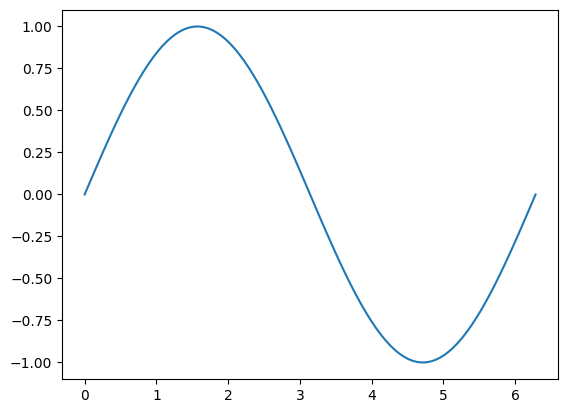

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
pie = np.pi
x=np.linspace(0,2*pie,100)
y=np.sin(x)
%matplotlib inline
plt.plot(x,y)

In [ ]:
#2-d arrays using numpy
import numpy as np
a = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
A=np.array(a) #creating an array in numpy
print (A.size)  #this give the total size of the array all the elements present in the array
print (A.ndim)  #this give the dimension of the array
print (A.shape) #this gives the n*m of the array 
print (A[0,0:2])

B = np.array([[0, 1], [1, 0], [1, 1], [-1, 0]])

mat_mult = np.dot(A,B) #this give the complex matrix multiplication as result
print (mat_mult) 



12
2
(3, 4)
[1 2]
[[ 1  4]
 [ 5 12]
 [ 9 20]]


In [ ]:
import numpy as np
a=[-1,1]
A=np.array(a)
b=[1,1]
B=np.array(b)

dot_product=np.dot(A,B)
print (dot_product)



0


In [ ]:
X=np.array([[1,0,1],[2,2,2]]) 
print (X)
out=X[0:2,2]

print(out)

[[1 0 1]
 [2 2 2]]
[1 2]


In [ ]:
import pandas as pd
from pycoingecko import CoinGeckoAPI
cg=CoinGeckoAPI()
bitcoin_data = cg.get_coin_market_chart_by_id(id='bitcoin' ,vs_currency='usd',days=30)
data=pd.DataFrame(bitcoin_data['prices'],columns=['TimeStamp','Prices'])
data['Date'] = pd.to_datetime(data['TimeStamp'],unit='ms')

print (data)

         TimeStamp        Prices                    date
0    1739109836421  95906.491717 2025-02-09 14:03:56.421
1    1739113446468  96162.133772 2025-02-09 15:04:06.468
2    1739116869843  96498.546520 2025-02-09 16:01:09.843
3    1739120652396  96458.060935 2025-02-09 17:04:12.396
4    1739124531218  96125.102120 2025-02-09 18:08:51.218
..             ...           ...                     ...
715  1741687271265  81494.188491 2025-03-11 10:01:11.265
716  1741690887631  81788.491570 2025-03-11 11:01:27.631
717  1741694988503  81525.575198 2025-03-11 12:09:48.503
718  1741698186137  81136.773485 2025-03-11 13:03:06.137
719  1741703149000  80317.148999 2025-03-11 14:25:49.000

[720 rows x 3 columns]


In [ ]:
import mysql.connector

conn=mysql.connector.connect(
  host="localhost",
  user="root",
  password="Nitish@7800",
  database="hr"
)

Cursor=conn.cursor()
Cursor.execute('Select * from departments')
Result=Cursor.fetchall()

for all in Result:
  print (all)

Cursor.close()
conn.close()
print(Result)


[]


In [ ]:
# how to run the queries through a python notebook 
import sqlite3
import pandas as pd
conn1=sqlite3.connect("my_data_base.db") # DATA BASE CONNECT OBJECT TO FORM CONNECTION BETWEEN THE DATABASE AND THE NOTEBOOK
cursor_obj=conn1.cursor() # CURSOR OBJECT ON THE CONNECTION TO WRITE THE QUERIES ON .

cursor_obj.execute('DROP TABLE IF EXISTS INSTRUCTOR1 ') #DROP THE TABLE IF IT ALREADY EXISTS 

# THIS CREATES A NEW TABLE WITHE THE NAME INSTRUCTOR 1
table=""" CREATE TABLE IF NOT EXISTS INSTRUCTOR1( 
  ID INTEGER PRIMARY KEY NOT NULL,
  FNAME VARCHAR(20),
  LNAME VARCHAR(20),
  CITY VARCHAR(20),
  CCODE CHAR(2)
)"""
cursor_obj.execute(table)

insert_data=""" INSERT INTO INSTRUCTOR1 (ID,FNAME,LNAME,CITY,CCODE)
  VALUES (1,'RAV','AHUJA','TORONTO','CA'),
        (2,'DHYAN','AHUJA','COIMBATOOR','IN'),
        (3,'AVI','PARDAL','BANGALURU','IN'),
        (4,'RAJNEESH','ARORA','TORONTO','CA'),
        (5,'RAVINDAR','SENI','TORONTO','CA')
  """
cursor_obj.execute(insert_data)
cursor_obj.execute("SELECT * FROM INSTRUCTOR1") 

result_set = cursor_obj.fetchall()
cursor_obj.close() #THESE 3 STATEMENTS NEEDS TO BE EXECUTED IN THE SAME WAY closing cursor 
conn1.commit() # THESE 3 STATEMENTS NEEDS TO BE EXECUTED IN THE SAME WAY commiting any pending transactions
conn1.close() # THESE 3 STATEMENTS NEEDS TO BE EXECUTED IN THE SAME WAY closing all the open cursor or connections, 

df=pd.DataFrame(result_set) # PRINT THE RESULT SET AS A DATA FRAME 
print(df)

for rws in result_set: # TO PRINT THE RESULT SET NORMALLY 
  print (rws)

   0         1       2           3   4
0  1       RAV   AHUJA     TORONTO  CA
1  2     DHYAN   AHUJA  COIMBATOOR  IN
2  3       AVI  PARDAL   BANGALURU  IN
3  4  RAJNEESH   ARORA     TORONTO  CA
4  5  RAVINDAR    SENI     TORONTO  CA
(1, 'RAV', 'AHUJA', 'TORONTO', 'CA')
(2, 'DHYAN', 'AHUJA', 'COIMBATOOR', 'IN')
(3, 'AVI', 'PARDAL', 'BANGALURU', 'IN')
(4, 'RAJNEESH', 'ARORA', 'TORONTO', 'CA')
(5, 'RAVINDAR', 'SENI', 'TORONTO', 'CA')


In [20]:
import sqlite3     # IMPORTING SQLITE DATABASE (INBUILT DATABASE TABLE)
import pandas as pd # IMPORTING PANDAS TO FORM A DATA FRAME

con2= sqlite3.connect("my_data_base.db") # ESTABLISHING A CONNECTTION BETWEEN THE DATABASE AND THE SCRIPT 
cursor2 = con2.cursor() # MAKING A CURSOR OBJECT FOR THE EXECUTION OF THE SCRIPTS
cursor2.execute('DROP TABLE IF EXISTS INSTRUCTOR2') #DROP THE TABLE IF IT ALREADY EXISTS

# ASSIGNING A CREATE TABLE QUERY INSIDE A VARIABLE THAT WILL LATER ON BE EXECUTED IN THE CURSOR.EXECUTE
table =""" CREATE TABLE IF NOT EXISTS INSTRUCTOR2(  
ID INTEGER(2) PRIMARY KEY NOT NULL,
FIRST_NAME VARCHAR(20) NOT NULL,
LAST_NAME VARCHAR(20) NOT NULL
)
"""
cursor2.execute(table) # EXECUTING THE CREATE TABLE QUERY THROUGH THE TABLE VARIABLE

#INSERT TABLE QUERY
insert="""INSERT INTO INSTRUCTOR2 (ID,FIRST_NAME,LAST_NAME)
VALUES
(01,"Nitish","Pardal"),
(02,"Siddhant","Singh")
"""

cursor2.execute(insert) # EXECUTING THE INSERT TABLE QUERY

cursor2.execute("SELECT * FROM INSTRUCTOR2") # SELECT QUERY FOR FETCHING ALL THE TABLE INFO OF INSTRUCTOR2

result_set2=cursor2.fetchall() # FETCHING ALL THE INFORMATION FROM THE EXECUTION OF THE SELECT QUERY

# METHOD2 : RETRIEVING DATA INTO A DATAFRAME USING PANDAS:
df3=pd.read_sql_query("SELECT * FROM INSTRUCTOR2",con2) 

cursor2.close() #CLOSING THE CURSOR
con2.commit() #COMMITING ANY PENDING TRANSACTIONS OR ANY PENDING QUERY 
con2.close() # CLOSING THE CONNECTION 

df2=pd.DataFrame(result_set2) # CONVERTING THE TABLE TO DATA FRAME USING THE PANDAS DATAFRAME FUNCTION
print(df2)
print("\n")
print("Shape of the dataframe",df2.shape)

print("\n")
#printing datframe3 using the read_sql_query function()

print(df3)
print("\n")

for rows in result_set2:
  print(rows)


   0         1       2
0  1    Nitish  Pardal
1  2  Siddhant   Singh


Shape of the dataframe (2, 3)


   ID FIRST_NAME LAST_NAME
0   1     Nitish    Pardal
1   2   Siddhant     Singh


(1, 'Nitish', 'Pardal')
(2, 'Siddhant', 'Singh')


In [23]:
!pip install --user ipython-sql

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ------------------- -------------------- 1.0/2.1 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 5.1 MB/s eta 0:00:00


In [37]:
import sqlite3
conn_sq2=sqlite3.connect("HR.db")
cursor_obj2 = conn_sq2.cursor()

%reload_ext sql
%sql sqlite:///HR.db

create=""" CREATE TABLE IF NOT EXISTS HR_DETAILS (
ID INTEGER(2) PRIMARY KEY NOT NULL,
FIRST_NAME VARCHAR(20),
LAST_NAME VARCHAR(20)
)"""
cursor_obj2.execute(create)

insert= ''' INSERT INTO HR_DETAILS 
(ID,FIRST_NAME,LAST_NAME)
VALUES
(01,"NITISH","PARDAL"),
(02,"AVI","PARDAL"),
(03,"SHREYA","TIWARI")'''

cursor_obj2.execute(insert)



cursor_obj2.close()
conn_sq2.commit()
conn_sq2.rollback()
conn_sq2.close()


OperationalError: database is locked